In [17]:
import sqlite3
import pandas as pd
con = sqlite3.connect("database.sqlite", timeout=10)
c = con.cursor()

In [18]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabs = pd.DataFrame(c.fetchall())
tabs.columns = [x[0] for x in c.description]
tabs

,name
0,sqlite_sequence
1,Matches
2,Teams_in_Matches
3,Teams
4,Unique_Teams
5,Teams2011


The "Teams2011" Table is the Table that was added below.  Let's look at each of the other Tables.

In [151]:
c.execute("SELECT * FROM sqlite_sequence")
seq = pd.DataFrame(c.fetchall())
seq.columns = [x[0] for x in c.description]
seq.head()

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [152]:
c.execute("SELECT * FROM Matches LIMIT 10")
mat = pd.DataFrame(c.fetchall())
mat.columns = [x[0] for x in c.description]
mat

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
5,6,D2,2009,2010-04-03,Union Berlin,Karlsruhe,1,1,D
6,7,D2,2009,2009-08-14,Paderborn,Karlsruhe,2,0,H
7,8,D2,2009,2010-03-08,Bielefeld,Karlsruhe,0,1,A
8,9,D2,2009,2009-09-26,Kaiserslautern,Karlsruhe,2,0,H
9,10,D2,2009,2009-11-21,Hansa Rostock,Karlsruhe,2,1,H


In [153]:
c.execute("SELECT * FROM Teams_in_Matches LIMIT 10")
tim = pd.DataFrame(c.fetchall())
tim.columns = [x[0] for x in c.description]
tim

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
5,3,44
6,4,29
7,4,44
8,5,29
9,5,49


In [154]:
c.execute("SELECT * FROM Teams LIMIT 10")
teams = pd.DataFrame(c.fetchall())
teams.columns = [x[0] for x in c.description]
teams

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271
5,2017,M'gladbach,31,25,17,154400000,4980000,54014
6,2017,Wolfsburg,31,24,14,124430000,4010000,30000
7,2017,FC Koln,24,26,9,118550000,4940000,49968
8,2017,Hoffenheim,31,24,14,107330000,3460000,30164
9,2017,Hertha,26,26,12,86800000,3340000,74475


In [155]:
c.execute("SELECT * FROM Unique_Teams LIMIT 10")
uteams = pd.DataFrame(c.fetchall())
uteams.columns = [x[0] for x in c.description]
uteams

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
5,M'gladbach,6
6,Wolfsburg,7
7,FC Koln,8
8,Hoffenheim,9
9,Hertha,10


In [157]:
c.execute("CREATE TABLE IF NOT EXISTS Teams2011 (team_name text, goals_scored_2011 int, wins_2011 int, visualization blob, rainy_wins_percentage float)")

In [158]:
c.execute("SELECT * FROM Teams2011 LIMIT 10")
team11 = pd.DataFrame(c.fetchall())
team11

""


In [159]:
c.execute("SELECT COUNT(*) FROM Unique_Teams")
print(c.fetchall())

[(128,)]


In [160]:
c.execute("SELECT COUNT(*) FROM Matches")
print(c.fetchall())

[(24625,)]


Interesting.  The number of unique teams is correctly indicated in the above table, but the number of matches isn't.  We'll proceed as if it were.

In [163]:
c.execute("SELECT COUNT(*) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(992,)]


In [30]:
c.execute("SELECT COUNT(DISTINCT(HomeTeam)) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(56,)]


In [32]:
c.execute("SELECT COUNT(DISTINCT(AwayTeam)) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(56,)]


In [187]:
c.execute("SELECT DISTINCT(HomeTeam) FROM Matches WHERE Season=2011 ORDER BY HomeTeam")
allteams = pd.DataFrame(c.fetchall())
allteams.columns = [x[0] for x in c.description]
print(len(allteams))
allteams.head()

56


,HomeTeam
0,Aachen
1,Arsenal
2,Aston Villa
3,Augsburg
4,Bayern Munich


All our team team tables from now on (involving just 2011 Season) should have 56 teams. Otherwise data will be missing.

In [188]:
c.execute("SELECT HomeTeam, SUM(FTHG) AS HomeGoals FROM Matches WHERE Season=2011 GROUP BY HomeTeam ORDER BY HomeTeam")
home_goals = pd.DataFrame(c.fetchall())
home_goals.columns = [x[0] for x in c.description]
print(len(home_goals))
home_goals.head()

56


,HomeTeam,HomeGoals
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [189]:
c.execute("SELECT AwayTeam, SUM(FTAG) AS AwayGoals FROM Matches WHERE Season=2011 GROUP BY AwayTeam ORDER BY AwayTeam")
away_goals = pd.DataFrame(c.fetchall())
away_goals.columns = [x[0] for x in c.description]
print(len(away_goals))
away_goals.head()

56


,AwayTeam,AwayGoals
0,Aachen,15
1,Arsenal,35
2,Aston Villa,17
3,Augsburg,16
4,Bayern Munich,28


In [190]:
c.execute("DROP TABLE IF EXISTS Home")
c.execute("CREATE TABLE Home AS SELECT HomeTeam, SUM(FTHG) AS HomeGoals FROM Matches WHERE Season=2011 GROUP BY HomeTeam ORDER BY HomeTeam")
c.execute("DROP TABLE IF EXISTS Away")
c.execute("CREATE TABLE Away AS SELECT AwayTeam, SUM(FTAG) AS AwayGoals FROM Matches WHERE Season=2011 GROUP BY AwayTeam ORDER BY AwayTeam")
c.execute("SELECT Home.HomeTeam AS Team, Home.HomeGoals, Away.AwayGoals, Home.HomeGoals + Away.AwayGoals AS BothGoals FROM HOME INNER JOIN Away ON Home.HomeTeam=Away.AwayTeam")
HomeAway = pd.DataFrame(c.fetchall())
HomeAway.columns = [x[0] for x in c.description]
print(len(away_goals))
HomeAway.head()

56


,Team,HomeGoals,AwayGoals,BothGoals
0,Aachen,15,15,30
1,Arsenal,39,35,74
2,Aston Villa,20,17,37
3,Augsburg,20,16,36
4,Bayern Munich,49,28,77


In [191]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeWins FROM Matches WHERE FTR='H' AND Season=2011 GROUP BY HomeTeam")
HomeWins = pd.DataFrame(c.fetchall())
HomeWins.columns = [x[0] for x in c.description]
print(len(HomeWins))
HomeWins.head()

56


,HomeTeam,HomeWins
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [192]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeNonWins FROM Matches WHERE (FTR='A' OR FTR='D') AND Season=2011 GROUP BY HomeTeam")
HomeNonWins = pd.DataFrame(c.fetchall())
HomeNonWins.columns = [x[0] for x in c.description]
print(len(HomeNonWins))
HomeNonWins.head()

56


,HomeTeam,HomeNonWins
0,Aachen,13
1,Arsenal,7
2,Aston Villa,15
3,Augsburg,11
4,Bayern Munich,3


In [193]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeGames FROM Matches WHERE Season=2011 GROUP BY HomeTeam")
AllHome = pd.DataFrame(c.fetchall())
AllHome.columns = [x[0] for x in c.description]
print(len(AllHome))
AllHome.head()


56


,HomeTeam,HomeGames
0,Aachen,17
1,Arsenal,19
2,Aston Villa,19
3,Augsburg,17
4,Bayern Munich,17


In [194]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeLosses FROM Matches WHERE FTR='A' AND Season=2011 GROUP BY HomeTeam")
HomeLosses = pd.DataFrame(c.fetchall())
HomeLosses.columns = [x[0] for x in c.description]
print(len(HomeLosses))
HomeLosses.head()

54


,HomeTeam,HomeLosses
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2


Interseting: len=54.  Apparently two teams had no Home Losses.  Way to go teams!

In [195]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayWins FROM Matches WHERE FTR='A' AND Season=2011 GROUP BY AwayTeam")
AwayWins = pd.DataFrame(c.fetchall())
AwayWins.columns = [x[0] for x in c.description]
print(len(AwayWins))
AwayWins.head()

56


,AwayTeam,AwayWins
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [196]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayNonWins FROM Matches WHERE (FTR='H' OR FTR='D') AND Season=2011 GROUP BY AwayTeam")
AwayNonWins = pd.DataFrame(c.fetchall())
AwayNonWins.columns = [x[0] for x in c.description]
print(len(AwayNonWins))
AwayNonWins.head()

56


,AwayTeam,AwayNonWins
0,Aachen,15
1,Arsenal,10
2,Aston Villa,16
3,Augsburg,15
4,Bayern Munich,8


In [197]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayGames FROM Matches WHERE Season=2011 GROUP BY AwayTeam")
AllAway = pd.DataFrame(c.fetchall())
AllAway.columns = [x[0] for x in c.description]
print(len(AllAway))
AllAway.head()


56


,AwayTeam,AwayGames
0,Aachen,17
1,Arsenal,19
2,Aston Villa,19
3,Augsburg,17
4,Bayern Munich,17


In [198]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayLosses FROM Matches WHERE FTR='H' AND Season=2011 GROUP BY AwayTeam")
AwayLosses = pd.DataFrame(c.fetchall())
AwayLosses.columns = [x[0] for x in c.description]
print(len(AwayLosses))
AwayLosses.head()

56


,AwayTeam,AwayLosses
0,Aachen,8
1,Arsenal,7
2,Aston Villa,6
3,Augsburg,8
4,Bayern Munich,5


In [199]:
HomeWins.set_index('HomeTeam', inplace=True)
HomeLosses.set_index('HomeTeam', inplace=True)
HomeNonWins.set_index('HomeTeam', inplace=True)
AwayWins.set_index('AwayTeam', inplace=True)
AwayLosses.set_index('AwayTeam', inplace=True)
AwayNonWins.set_index('AwayTeam', inplace=True)
pass

In [216]:
WinsLosses = HomeWins.join(AwayWins, how='left').join(HomeLosses, how='left').join(AwayLosses, how='left').join(HomeNonWins, how='left').join(AwayNonWins, how='left')
print(len(WinsLosses))
WinsLosses.head()

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins
HomeTeam,,,,,,
Aachen,4,2,7.0,8,13,15
Arsenal,12,9,3.0,7,7,10
Aston Villa,4,3,8.0,6,15,16
Augsburg,6,2,4.0,8,11,15
Bayern Munich,14,9,2.0,5,3,8


In [256]:
WinsLosses[WinsLosses.isna().any(axis=1)]

,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins
HomeTeam,,,,,,
Hannover,10,2,NaN,10,7,15
Man City,18,10,NaN,5,1,9


**Man City** and **Hanover** had no home losses and were assigned NaNs.  The others in that column are floats.  Let's fix these problems with a new DataFrame.

In [202]:
WinLoss = WinsLosses.fillna(0).astype(int)

In [204]:
print(len(WinLoss))
WinLoss.head()

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins
HomeTeam,,,,,,
Aachen,4,2,7,8,13,15
Arsenal,12,9,3,7,7,10
Aston Villa,4,3,8,6,15,16
Augsburg,6,2,4,8,11,15
Bayern Munich,14,9,2,5,3,8


In [209]:
WinLoss['TotalWins'] = WinLoss.HomeWins + WinLoss.AwayWins

In [210]:
WinLoss['TotalLosses'] = WinLoss.HomeLosses + WinLoss.AwayLosses

In [211]:
WinLoss['TotalDraws'] = (WinLoss.HomeNonWins - WinLoss.HomeLosses) + (WinLoss.AwayNonWins - WinLoss.AwayLosses)

In [212]:
WinLoss['TotalGames'] = WinLoss.TotalWins + WinLoss.TotalLosses + WinLoss.TotalDraws

In [482]:
WinLoss['PercentWins'] = (WinLoss.TotalWins/WinLoss.TotalGames)*100
WinLoss['PercentLosses'] = (WinLoss.TotalLosses/WinLoss.TotalGames)*100
WinLoss['PercentDraws'] = (WinLoss.TotalDraws/WinLoss.TotalGames)*100

In [483]:
print(len(WinLoss))
WinLoss.head()

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins,TotalDraws,TotalWins,TotalLosses,TotalGames,PercentWins,PercentLosses,PercentDraws
HomeTeam,,,,,,,,,,,,,
Aachen,4,2,7,8,13,15,13,6,15,34,17.647059,44.117647,38.235294
Arsenal,12,9,3,7,7,10,7,21,10,38,55.263158,26.315789,18.421053
Aston Villa,4,3,8,6,15,16,17,7,14,38,18.421053,36.842105,44.736842
Augsburg,6,2,4,8,11,15,14,8,12,34,23.529412,35.294118,41.176471
Bayern Munich,14,9,2,5,3,8,4,23,7,34,67.647059,20.588235,11.764706


Weird.  Different teams have different TotalGames.  This demands explanation.  The sum of TotalGames should be twice the number of matches in 2011.

In [486]:
NumberOfGamesWithData = (WinLoss.TotalGames.sum()/2).astype(int)
print("NumberOfGamesWithData: " + str(NumberOfGamesWithData))

NumberOfGamesWithData: 992


In [245]:
c.execute("SELECT COUNT(*) FROM Matches WHERE Season=2011")
print("Confirming that this number is the same as in original Matches Table: "+str(c.fetchall()))

Confirming that this number is the same as in original Matches Table: [(992,)]


The calculation above confirms that my WinLoss DataFrame contains all of the matches in the Matches Table of my original database, and suggests that the DataFrame was constructed correctly.  This result leaves the question unanswered.  According to Google, soccer teams in Europe each play 38 games per season \[UPDATE: More Googling revealed that the German Soccer League plays only 34 games per season!  The Documentation on Kaggle reveals that both the German and English leagues are contained in the dataset. Problem Solved!\].  On the other hand, if each team had played 38 games, the calculation below shows there would be 72 missing matches from the original data set for that year.  We also saw a discrepancy in the number of matches in the Matches table (too few) and number indicated in the sqlite_sequence Table.  The two discrepancies are consistent.

In [488]:
MatchesExpectedFor56TeamsEach38Games = int(56*38/2)
print("MatchesExpectedIfAll56TeamsPlay38Games: " + str(MatchesExpectedFor56Teams))
print("MatchesApparentlyMissing: " + str(MatchesExpectedFor56TeamsEach38Games - NumberOfGamesWithData))
print("Solution: German League Teams Play Only 34 Games Per Season!")

MatchesExpectedIfAll56TeamsPlay38Games: 1064
MatchesApparentlyMissing: 72
Solution: German League Teams Play Only 34 Games Per Season!


In [252]:
WinLoss[WinLoss['TotalGames']==34].TotalGames.count()

36

In [253]:
WinLoss[WinLoss['TotalGames']==38].TotalGames.count()

20

The number of teams that play 34 games and the number of teams that play 38 games sum to 56 (the total number of teams).

In [363]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
from PIL import Image
from cycler import cycler

The instructions for this lab asked for a histogram, but they really wanted a bar plot.  Here is a histogram.  This histogram would make more sense if all teams played the same number of games (but, OK, it's close).  One solution to the problem just identified is to plot (as the quantitative variable) **the percentage (or proportion) of wins, losses, and draws (results)**.  The plot, instead of ranging from 0 to 28, would range from 0% to 100% (but, of course, the data wouldn't go that high).  What we have now (below) is **count of results** on the horizontal scale.  I chose to do the histogram this way because I wanted to compare with the plots below (which are part of the deliverable for this project).  However, I now realize that I could do the bar plots, below, with percentage, too.  If I have time, I'll redo all plots in terms of proportion, which would make better sense, leaving both in the notebook. The way I chose first was based on my interpretation of the directions, but I now see that they can be interpreted a different way.

\[UPDATE: Done!  That didn't take long!  Now I have plots with which I can make meaningful comparisons between teams!\]

This histograms, below, will helps us set a consistent scale for the axes of various bar plots, also below.  

**For Counts:** Looking at the counts histogram, I chose 0 through 30 for counts for all bar plots for each team.  The maximum result is a count of 28, so 30 gives a little space.  After playing around with the bin width, I chose a bin width of 1.  That gives the most information and it does not seem too small for this data.  Because the results are integers, a bin width of 1 is minimal.  The distribution is visible still and it is not too broken up by the small bin width.

**For Percentages:**  Looking at the percentages histogram, I chose 0% through 75% as my consistent scale.  For the bin with I chose 5% bins, starting at 0%.

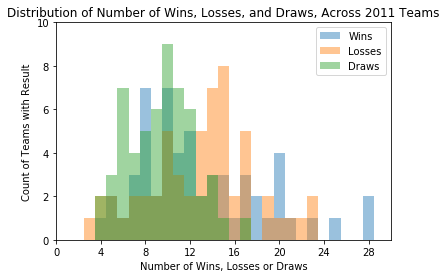

In [546]:
# Below are default colors for histogram.  Setting them to make colors for bar plot consistent.
color_wins = '#1f77b4'  # Blue
color_losses = '#ff7f0e'  # Orange
color_draws = '#2ca02c'  # Green
alpha_level = .45

count_binrange = np.arange(.5,30,1)
count_xlim = (0,30)
count_xticks = np.arange(0,29,4)

plt.hist(WinLoss.TotalWins, alpha=alpha_level, label='Wins', bins=count_binrange, color=color_wins)
plt.hist(WinLoss.TotalLosses, alpha=alpha_level, label='Losses', bins=count_binrange, color=color_losses)
plt.hist(WinLoss.TotalDraws, alpha=alpha_level, label='Draws', bins=count_binrange, color=color_draws)
plt.legend()
plt.xlim(count_xlim)
plt.xticks(count_xticks)
plt.ylim((0,10))  # Different for bar plots

plt.title("Distribution of Number of Wins, Losses, and Draws, Across 2011 Teams")
plt.xlabel("Number of Wins, Losses or Draws")
plt.ylabel("Count of Teams with Result")
pass

Now we redo the histogram in terms of percentages on the horizontal axis, instead of counts.

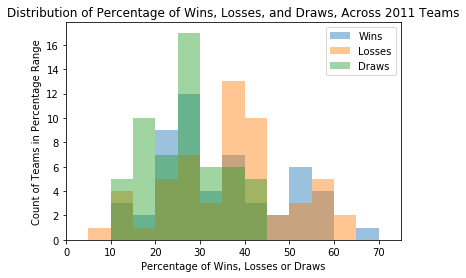

In [547]:
#ax = plt.subplot(1,1,1)
percent_binrange = np.arange(0,75,5)
percent_xlim = (0,75)
percent_xticks = np.arange(0,75,10)
plt.hist(WinLoss.PercentWins, alpha=alpha_level, label='Wins', bins=percent_binrange, color=color_wins)
plt.hist(WinLoss.PercentLosses, alpha=alpha_level, label='Losses', bins=percent_binrange, color=color_losses)
plt.hist(WinLoss.PercentDraws, alpha=alpha_level, label='Draws', bins=percent_binrange, color=color_draws)
plt.legend()
plt.title("Distribution of Percentage of Wins, Losses, and Draws, Across 2011 Teams")
plt.xlabel("Percentage of Wins, Losses or Draws")
plt.ylabel("Count of Teams in Percentage Range")
plt.xlim(percent_xlim)
plt.xticks(percent_xticks)
pass

Now let's do a bar plot for each team.  We'll start with an example for Arsenal.

In [534]:
team = 1 # Arsenal
print([WinLoss.TotalWins.iloc[team], WinLoss.TotalLosses.iloc[team], WinLoss.TotalDraws.iloc[team]])
print([WinLoss.loc['Arsenal',:]])


[21, 10, 7]
[HomeWins         12.000000
AwayWins          9.000000
HomeLosses        3.000000
AwayLosses        7.000000
HomeNonWins       7.000000
AwayNonWins      10.000000
TotalDraws        7.000000
TotalWins        21.000000
TotalLosses      10.000000
TotalGames       38.000000
PercentWins      55.263158
PercentLosses    26.315789
PercentDraws     18.421053
Name: Arsenal, dtype: float64]


In [557]:
def make_team_bar(team, how='count'):
    yrange = np.arange(2,-1, -1)  # array([2, 1, 0]), reverse order so Wins go on top.
    
    xshift = .5
    
    if how.lower().startswith("count"):
        barlist = plt.barh(yrange,
                           [WinLoss.TotalWins.iloc[team], 
                            WinLoss.TotalLosses.iloc[team], 
                            WinLoss.TotalDraws.iloc[team]],
                           alpha = alpha_level)
        plt.text(WinLoss.TotalWins.iloc[team] + xshift, yrange[0], str(WinLoss.TotalWins.iloc[team]))
        plt.text(WinLoss.TotalLosses.iloc[team] + xshift, yrange[1], str(WinLoss.TotalLosses.iloc[team]))
        plt.text(WinLoss.TotalDraws.iloc[team] + xshift, yrange[2], str(WinLoss.TotalDraws.iloc[team]))
        plt.xlim(count_xlim)
        plt.xticks(count_xticks)
        howstring = 'Count'
    elif how.lower().startswith("percent"):
        barlist = plt.barh(yrange, 
                           [WinLoss.PercentWins.iloc[team],
                            WinLoss.PercentLosses.iloc[team],
                            WinLoss.PercentDraws.iloc[team]],
                           alpha = alpha_level)
        plt.text(WinLoss.PercentWins.iloc[team] + xshift, yrange[0],
                 str(round(WinLoss.PercentWins.iloc[team], 1))+'%')
        plt.text(WinLoss.PercentLosses.iloc[team] + xshift, yrange[1],
                 str(round(WinLoss.PercentLosses.iloc[team], 1))+'%')
        plt.text(WinLoss.PercentDraws.iloc[team] + xshift, yrange[2], 
                 str(round(WinLoss.PercentDraws.iloc[team], 1))+'%')
        plt.xlim(percent_xlim)
        plt.xticks(percent_xticks)
        howstring = "Percentage"
    else:
        raise Exception("In make_team_bar, argument 'how' should be 'count' or percent.")
    plt.xlabel(howstring+" of Wins, Losses or Draws")
    plt.title(howstring+'s for ' + 
              WinLoss.index[team] + 
              ' 2011: (' + str(WinLoss.TotalGames.iloc[team]) +
              ' Matches Total)')
    plt.yticks(yrange,['Wins','Losses','Draws'])

    barlist[0].set_color(color_wins)  
    barlist[1].set_color(color_losses) 
    barlist[2].set_color(color_draws)  
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    im = Image.open(buf)
    buf.close()
    return(im)

PIL.PngImagePlugin.PngImageFile

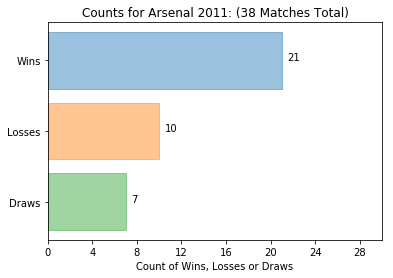

In [558]:
im = make_team_bar(team=1)  # team=1 is Arsenal
type(im)

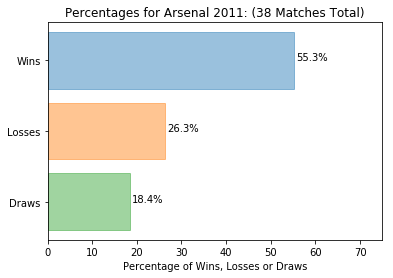

In [559]:
im = make_team_bar(team=1, how='percent')  # team=12 is Dresden

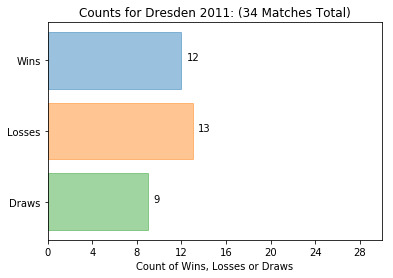

In [561]:
im = make_team_bar(team=12)

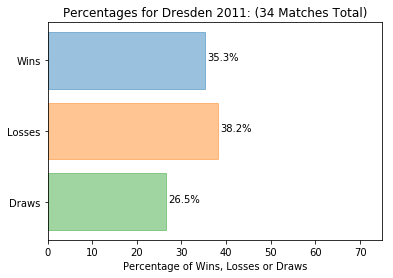

In [562]:
im = make_team_bar(team=12,how='percent')